In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy as sp
import matplotlib as mpl
import seaborn as sns
from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import GridSearchCV

# Setting up Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

# Setting up Seaborn
sns.set_style("whitegrid")
#sns.set_context("poster")

%matplotlib inline

In [97]:
train = pd.read_csv('data/training_data.csv')
test = pd.read_csv('data/test_data.csv')

In [98]:
train.Revenue.value_counts()

0    8858
1    1622
Name: Revenue, dtype: int64

In [99]:
train.shape

(10480, 19)

In [100]:
training = train.drop('Revenue', axis=1)

In [101]:
training = training.drop('Unnamed: 0', axis=1)

test = test.drop('Unnamed: 0', axis=1)

In [102]:
training.shape

(10480, 17)

In [103]:
test.shape

(1850, 18)

In [104]:
training.head(5)

,Homepage,Homepage _Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Province,TrafficType,VisitorType,Weekend
0,1.0,10.0,0.0,0.0,9.0,700.000000,0.000000,0.011111,29.621890,0.0,0.141412,2,2,9,10,0.854962,False
1,2.0,15.0,0.0,0.0,10.0,894.666667,0.000000,0.022222,0.000000,0.0,0.272233,2,4,4,2,0.854962,False
2,1.0,85.0,0.0,0.0,14.0,306.500000,0.000000,0.004444,0.000000,0.0,0.156107,2,2,3,2,0.854962,False
3,5.0,175.1,0.0,0.0,26.0,615.559524,0.000000,0.002083,62.773672,0.0,0.035782,1,1,1,3,0.138073,True
4,2.0,25.0,0.0,0.0,5.0,40.000000,0.066667,0.083333,0.000000,0.6,0.272233,2,2,1,1,0.854962,False


In [105]:
test.head(5)

,ID,Homepage,Homepage _Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Province,TrafficType,VisitorType,Weekend
0,1,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,0.276216,1,1,1,1,0.860000,False
1,2,0,0.0,0,0.0,24,743.750000,0.000000,0.016667,0.0,0.0,0.132432,2,2,2,2,0.133514,True
2,3,0,0.0,0,0.0,13,129.500000,0.015385,0.053846,0.0,0.0,0.252432,2,2,3,1,0.860000,False
3,4,3,84.0,0,0.0,59,1720.422222,0.026984,0.038232,0.0,0.0,0.039459,3,2,1,3,0.860000,True
4,5,0,0.0,0,0.0,13,390.500000,0.038462,0.053846,0.0,0.0,0.132432,2,2,1,13,0.860000,False


In [106]:
test = test.drop('ID', axis=1)

In [107]:
##Plot function for Confusion Matrix

#plt.rcParams['figure.figsize'] = (6.0, 6.0)
from sklearn.metrics import confusion_matrix
labels=['No revenue generated','Revenue generated']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.YlOrRd):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, ha='right', fontsize=12)
    plt.yticks(tick_marks, labels , fontsize=12)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

## Now That we have cleaned our dataset and transformed our features, let us train our Model.

In [108]:
## Converting the Training dataframe into a matrix and predictor as y 
X = training.as_matrix()
y = train["Revenue"]

In [109]:
X.shape

(10480, 17)

> Splitting the Data Set with features into Train set  and Test set to train our model.

In [110]:
import sklearn.model_selection 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, 
                                                                             y, 
                                                                             test_size = 0.3, 
                                                                             random_state = 0)

In [111]:
y_train.value_counts()

0    6185
1    1151
Name: Revenue, dtype: int64

In [112]:
ovrsmple = SMOTE(ratio='minority')
# ovrsmple = BorderlineSMOTE()
# ovrsmple = ADASYN()

X_train, y_train = ovrsmple.fit_sample(X_train, y_train)

In [113]:
np.bincount(y_train)

array([6185, 6185], dtype=int64)

In [114]:
# sm = SMOTE(ratio = 1.0)
# sm = SMOTE(sampling_strategy='minority')
# X_train, y_train = sm.fit_sample(X_train, y_train)
# X_train_sm, Y_train_sm = X_train, Y_train

In [115]:
# param_grid = { 
#     'n_estimators': [200, 500, 1000, 2000],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

In [116]:
from sklearn.svm import LinearSVC
svc = LinearSVC()

In [118]:
svc.fit(X_train, y_train)
print('SVM Train Accuracy Score :', svc.score(X_train, y_train))
print('SVM Test Score :', svc.score(X_test, y_test))

SVM Train Accuracy Score : 0.667178658043654
SVM Test Score : 0.8377862595419847


In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [121]:
knn.fit(X_train, y_train)
print('SVM Train Accuracy Score :', knn.score(X_train, y_train))
print('SVM Test Score :', knn.score(X_test, y_test))

SVM Train Accuracy Score : 0.9088924818108327
SVM Test Score : 0.7604961832061069


In [122]:
predict = knn.predict(test)

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability/robustness over a single estimator.

## Random Forest Classifier

In [68]:
import sklearn.ensemble
rfc = sklearn.ensemble.RandomForestClassifier(random_state=42)

# rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=1000, 
#                                               min_samples_split=5,
#                                               criterion='gini', 
#                                               max_features='auto',
#                                               oob_score=True,
#                                               random_state=1,
#                                               n_jobs=-1)

In [69]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [71]:
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500, 1000, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [73]:
rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=500, 
                                              min_samples_split=5,
                                              criterion='gini', 
                                              max_features='auto',
                                              max_depth = 8,
                                              oob_score=True,
                                              random_state=42,
                                              n_jobs=-1)

In [74]:
rfc.fit(X_train, y_train)

print('Random Forest Classifier Train Accuracy Score :', rfc.score(X_train, y_train))
print('Random Forest Classifier Test Score :', rfc.score(X_test, y_test))

Random Forest Classifier Train Accuracy Score : 0.9365400161681487
Random Forest Classifier Test Score : 0.8912213740458015


Confusion matrix
[[5710  475]
 [ 310 5875]]


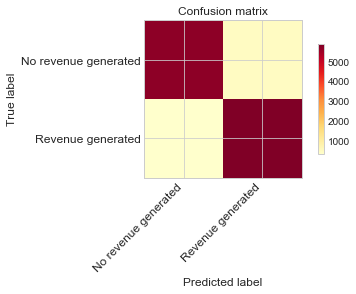

In [75]:
## Constructing the Confusion Matrix
cm = confusion_matrix(y_train, rfc.predict(X_train))
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

In [76]:
print(rfc.feature_importances_)

[0.04 0.03 0.01 0.   0.02 0.04 0.04 0.06 0.56 0.   0.06 0.02 0.02 0.01
 0.02 0.05 0.02]


Text(0,0.5,'Importance')

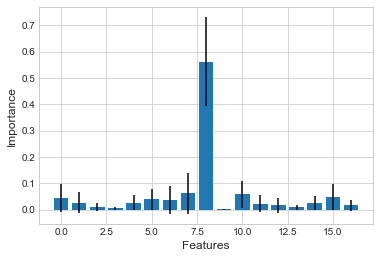

In [77]:
importance = rfc.feature_importances_
importance = pd.DataFrame(importance, index=training.columns, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_ 
                            for tree in rfc.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.iloc[:, 0]
yerr = importance.iloc[:, 1]
lables = list(training.columns.values)



ax = plt.bar(x, y, yerr=yerr ,align="center")
plt.xlabel('Features', fontsize = 12)
plt.ylabel('Importance', fontsize = 12)

#plt.show()

In [78]:
test.head()

,Homepage,Homepage _Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Province,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,0.276216,1,1,1,1,0.860000,False
1,0,0.0,0,0.0,24,743.750000,0.000000,0.016667,0.0,0.0,0.132432,2,2,2,2,0.133514,True
2,0,0.0,0,0.0,13,129.500000,0.015385,0.053846,0.0,0.0,0.252432,2,2,3,1,0.860000,False
3,3,84.0,0,0.0,59,1720.422222,0.026984,0.038232,0.0,0.0,0.039459,3,2,1,3,0.860000,True
4,0,0.0,0,0.0,13,390.500000,0.038462,0.053846,0.0,0.0,0.132432,2,2,1,13,0.860000,False


In [79]:
list(training.columns.values)

['Homepage',
 'Homepage _Duration',
 'Aboutus',
 'Aboutus_Duration',
 'Contactus',
 'Contactus_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Province',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [80]:
from sklearn.metrics import classification_report

In [81]:
predicted = rfc.predict(X_test)

In [82]:
report = classification_report(y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.96      0.91      0.93      2673
          1       0.61      0.77      0.68       471

avg / total       0.90      0.89      0.90      3144



Confusion matrix
[[2441  232]
 [ 110  361]]


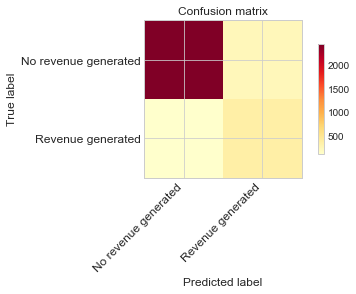

In [83]:
## Constructing the Confusion Matrix
cm = confusion_matrix(y_test, rfc.predict(X_test))
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

In [84]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=5)

In [85]:
print(all_accuracies)

[0.81 0.95 0.95 0.94 0.94]


In [86]:
print(all_accuracies.mean()) 

0.9146321746160064


In [87]:
print(all_accuracies.std())  

0.05448534190199053


In [88]:
predict = rfc.predict(test)

In [123]:
submission = pd.read_csv('data/hackstat2k19/sample_submisison.csv')

In [124]:
Final_merge = pd.concat([test, submission], axis=1)

In [125]:
Final_merge.head()

,Homepage,Homepage _Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Province,TrafficType,VisitorType,Weekend,ID,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,0.276216,1,1,1,1,0.860000,False,1,1
1,0,0.0,0,0.0,24,743.750000,0.000000,0.016667,0.0,0.0,0.132432,2,2,2,2,0.133514,True,2,1
2,0,0.0,0,0.0,13,129.500000,0.015385,0.053846,0.0,0.0,0.252432,2,2,3,1,0.860000,False,3,1
3,3,84.0,0,0.0,59,1720.422222,0.026984,0.038232,0.0,0.0,0.039459,3,2,1,3,0.860000,True,4,1
4,0,0.0,0,0.0,13,390.500000,0.038462,0.053846,0.0,0.0,0.132432,2,2,1,13,0.860000,False,5,1


In [126]:
Final_merge['Revenue'] = predict

In [127]:
Final_merge[['ID','Revenue']].to_csv('prediction/prediction_rf.csv', index=False)

In [128]:
sub = pd.read_csv('prediction/prediction_rf.csv')

In [129]:
sub.head()

,ID,Revenue
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [43]:
sub.Revenue.value_counts()

0    1547
1     303
Name: Revenue, dtype: int64

## Gradient Boosting

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
test_id = pd.read_csv('data/hackstat2k19/sample_submisison.csv')
test_id.columns = ['idd', 'status_group']
test_id = test_id.idd

In [46]:
def model_gb(X_train, X_test, y_train, y_test, test):
    if __name__ == '__main__':
    
        param_grid = {'learning_rate': [0.075,0.07],
                      'max_depth': [6,7],
                      'min_samples_leaf': [7,8],
                      'max_features': [1.0],
                      'n_estimators':[100, 200]}                      

        gbc = GridSearchCV(estimator=GradientBoostingClassifier(),
                                 param_grid=param_grid,
                                 n_jobs=-1)

        gbc.fit(X_train, y_train)

        best_params = gbc.best_params_

        print (best_params)
                                 
        validation_accuracy = gbc.score(X_test, y_test)
        print('Validation accuracy: ', validation_accuracy)
        
        predictions = gbc.predict(test)
        
        data = {'ID': test_id, 'Revenue': predictions}

        submit = pd.DataFrame(data=data)

        vals_to_replace = {1:'1',
                           0:'0'}

        submit.Revenue = submit.Revenue.replace(vals_to_replace)        

        submit.to_csv('prediction/predictions_gb.csv', index=False)

In [47]:
model_gb(X_train, X_test, y_train, y_test, test)

{'learning_rate': 0.07, 'max_depth': 7, 'max_features': 1.0, 'min_samples_leaf': 7, 'n_estimators': 100}
Validation accuracy:  0.9036259541984732
